# **Experiment Notebook**



In [294]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [295]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [296]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [297]:
pip install --index-url https://test.pypi.org/simple/ my_krml_25677648==2025.0.1.8

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [299]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [300]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [301]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [302]:
business_use_case_description = """The objective of this project is to develop a robust machine learning model capable of accurately predicting the likelihood of rainfall exactly seven days in advance for Sydney, Australia. Weather variability profoundly affects industries such as agriculture, logistics and event management, where the ability to anticipate rainfall directly impacts operational efficiency, risk management and resource allocation. By leveraging historical daily weather data spanning 2010 to 2024, the model will produce binary forecasts (rain or no rain) using a range of classification algorithms, with the best-performing model deployed as an API. This API will integrate seamlessly into the Open Meteo platform, providing businesses and users with accessible and reliable 7-day rainfall predictions. For agriculture, this enables optimised crop scheduling and irrigation planning; for logistics, it enhances route planning and supply chain resilience; and for event management, it facilitates contingency planning and venue selection. The capacity to make data-driven decisions based on advanced AI forecasting offers measurable improvements in operational planning and mitigates uncertainties associated with weather-dependent activities. Ultimately, this project strengthens the Open Meteo platform by positioning it as a comprehensive, data-driven decision support tool for industries where weather conditions critically influence success.
"""

In [303]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [304]:
business_objectives = """Accurate rainfall prediction models offer substantial benefits to a diverse array of stakeholders. By providing reliable forecasts, such models enable improved planning and optimised resource allocation, which help weather-dependent industries minimise operational disruptions, reduce avoidable costs, and enhance worker safety. Furthermore, precise rainfall predictions contribute to heightened public awareness and preparedness for sudden rain events, supporting community resilience. Conversely, inaccurate forecasts carry significant risks: false positives may lead to unnecessary delays and financial losses, while false negatives can jeopardise worker safety and result in missed opportunities for proactive mitigation. Therefore, the primary business objectives of this project are to maximise forecast accuracy to support effective decision-making, mitigate operational risks, and deliver measurable value to industry users and the broader community.
"""

In [305]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [306]:
stakeholders_expectations_explanations = """Rainfall predictions generated by the model are expected to support informed decision-making across a wide range of contexts and user groups. Individual users rely on accurate forecasts to plan personal activities such as weekends and outdoor events, thereby enhancing convenience and satisfaction. Event planners and project managers utilise these predictions to strategically schedule tasks, minimising disruptions caused by adverse weather. Weather-sensitive industries, including agriculture, logistics and event management, anticipate that these forecasts will facilitate meticulous operational planning, mitigate risks, and improve worker safety by avoiding outdoor activities during rainy periods. The stakeholder base therefore includes the general public, industry professionals, event organisers, and others whose activities are directly affected by weather conditions. Ultimately, stakeholders expect these rainfall forecasts to enable more effective planning, reduce operational disruptions, minimise financial losses, and enhance overall safety outcomes.
"""

In [307]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [308]:
import openmeteo_requests

import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.8678,
	"longitude": 151.2073,
	"start_date": "2010-01-01",
	"end_date": "2024-12-31",
	"daily": ["relative_humidity_2m_mean", "cloud_cover_mean", "cloud_cover_max", "cloud_cover_min", "wind_gusts_10m_mean", "wind_speed_10m_mean", "dew_point_2m_mean", "wet_bulb_temperature_2m_mean", "pressure_msl_mean", "vapour_pressure_deficit_max", "shortwave_radiation_sum", "temperature_2m_max", "temperature_2m_min", "rain_sum", "precipitation_hours", "pressure_msl_max", "pressure_msl_min", "weather_code", "temperature_2m_mean", "wind_gusts_10m_max", "wind_speed_10m_max", "wind_direction_10m_dominant", "et0_fao_evapotranspiration"],
	"timezone": "auto",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone: {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_relative_humidity_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_cloud_cover_mean = daily.Variables(1).ValuesAsNumpy()
daily_cloud_cover_max = daily.Variables(2).ValuesAsNumpy()
daily_cloud_cover_min = daily.Variables(3).ValuesAsNumpy()
daily_wind_gusts_10m_mean = daily.Variables(4).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(5).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(6).ValuesAsNumpy()
daily_wet_bulb_temperature_2m_mean = daily.Variables(7).ValuesAsNumpy()
daily_pressure_msl_mean = daily.Variables(8).ValuesAsNumpy()
daily_vapour_pressure_deficit_max = daily.Variables(9).ValuesAsNumpy()
daily_shortwave_radiation_sum = daily.Variables(10).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(11).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(12).ValuesAsNumpy()
daily_rain_sum = daily.Variables(13).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(14).ValuesAsNumpy()
daily_pressure_msl_max = daily.Variables(15).ValuesAsNumpy()
daily_pressure_msl_min = daily.Variables(16).ValuesAsNumpy()
daily_weather_code = daily.Variables(17).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(18).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(19).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(20).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(21).ValuesAsNumpy()
daily_et0_fao_evapotranspiration = daily.Variables(22).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["cloud_cover_mean"] = daily_cloud_cover_mean
daily_data["cloud_cover_max"] = daily_cloud_cover_max
daily_data["cloud_cover_min"] = daily_cloud_cover_min
daily_data["wind_gusts_10m_mean"] = daily_wind_gusts_10m_mean
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean
daily_data["wet_bulb_temperature_2m_mean"] = daily_wet_bulb_temperature_2m_mean
daily_data["pressure_msl_mean"] = daily_pressure_msl_mean
daily_data["vapour_pressure_deficit_max"] = daily_vapour_pressure_deficit_max
daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["rain_sum"] = daily_rain_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["pressure_msl_max"] = daily_pressure_msl_max
daily_data["pressure_msl_min"] = daily_pressure_msl_min
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration

df = pd.DataFrame(data = daily_data)

Coordinates: -33.84885787963867°N 151.1955108642578°E
Elevation: 51.0 m asl
Timezone: b'Australia/Sydney'b'GMT+10'
Timezone difference to GMT+0: 36000s


In [309]:
from my_krml_25677648.data.sets import eda_summary

In [310]:
# Explore df
eda_summary(df)

HEAD (First 5 Rows)

                       date  relative_humidity_2m_mean  cloud_cover_mean  \
0 2009-12-31 14:00:00+00:00                  82.359489         95.791664   
1 2010-01-01 14:00:00+00:00                  84.276886         64.166664   
2 2010-01-02 14:00:00+00:00                  74.055122        100.000000   
3 2010-01-03 14:00:00+00:00                  70.006538         72.875000   
4 2010-01-04 14:00:00+00:00                  73.884598         21.833334   

   cloud_cover_max  cloud_cover_min  wind_gusts_10m_mean  wind_speed_10m_mean  \
0            100.0             58.0            21.330000            10.419551   
1            100.0             17.0            26.010002             8.355687   
2            100.0            100.0            28.275000            12.964748   
3            100.0              9.0            23.565001            11.067534   
4             95.0              0.0            24.285002             9.724721   

   dew_point_2m_mean  wet_bulb_temp

### C.2 Define Target variable

In [311]:
# Create a variable 'precipitation_in_7_days', which is the rainfall 7 days from a given date
df['precipitation_in_7_days'] = df['rain_sum'].shift(-7)

# Create the target variable: 1 if it will rain (precipitation > 0 mm), else 0
df['rain_or_not'] = df['precipitation_in_7_days'].apply(lambda x: 1 if x > 0 else 0)

In [312]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,precipitation_in_7_days,rain_or_not
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0.0,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,0.3,1
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,8.020833,13.132172,1011.550049,...,1015.700012,1007.700012,3.0,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,0
5472,2024-12-24 14:00:00+00:00,64.223015,0.916667,8.0,0.0,27.209997,9.999595,13.904166,16.614202,1015.845886,...,1017.700012,1014.200012,0.0,21.368750,51.119999,20.690605,57.746136,6.146514,NaN,0
5473,2024-12-25 14:00:00+00:00,74.374580,13.125000,99.0,0.0,37.109997,15.707917,17.331251,19.040123,1011.941711,...,1016.299988,1007.099976,3.0,22.552084,62.639996,28.227304,37.269981,6.264203,NaN,0
5474,2024-12-26 14:00:00+00:00,57.966953,43.500000,100.0,0.0,41.294998,16.679815,16.254166,19.730782,1003.516663,...,1007.299988,1000.500000,53.0,26.202085,56.880001,24.012972,339.781250,6.296452,NaN,0
5475,2024-12-27 14:00:00+00:00,70.346695,33.875000,96.0,0.0,31.574997,12.241256,15.570831,17.523623,1009.345947,...,1011.400024,1007.200012,51.0,21.352081,48.239998,20.170443,109.408127,5.180197,NaN,0
5476,2024-12-28 14:00:00+00:00,63.680096,7.166667,44.0,0.0,27.345001,10.361734,13.604167,17.012634,1014.200012,...,1018.500000,1011.000000,1.0,22.214584,45.360001,17.727943,136.802414,6.468780,NaN,0
5477,2024-12-29 14:00:00+00:00,70.827507,41.833332,100.0,6.0,31.214998,12.572087,16.718752,18.610620,1017.649963,...,1020.500000,1015.099976,51.0,22.462500,42.839996,18.252037,84.956360,5.375723,NaN,0
5478,2024-12-30 14:00:00+00:00,74.040428,60.375000,100.0,0.0,25.004995,9.582100,17.837500,19.490635,1014.466614,...,1015.700012,1013.099976,3.0,22.993752,40.320000,14.934577,65.856026,5.312834,NaN,0


In [313]:
# Drop rows where 'precipitation_in_7_days' is null
df.dropna(subset=['precipitation_in_7_days'], inplace=True)

In [314]:
# Last 10 rows of df
df.tail(10)

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,precipitation_in_7_days,rain_or_not
5462,2024-12-14 14:00:00+00:00,84.068214,67.500000,100.0,4.0,27.000000,10.344865,20.489584,21.375288,1011.487549,...,1014.500000,1008.700012,51.0,23.512499,43.199997,16.645864,157.912140,5.106747,0.2,1
5463,2024-12-15 14:00:00+00:00,79.673569,32.166668,100.0,0.0,33.929996,13.842854,20.516665,21.684248,1012.604187,...,1015.099976,1010.099976,51.0,24.477083,56.519997,24.845869,52.272655,5.735040,0.0,0
5464,2024-12-16 14:00:00+00:00,71.048088,36.958332,100.0,0.0,40.530003,15.718639,19.547915,21.555021,1007.416565,...,1011.700012,1003.400024,3.0,25.910418,69.479996,31.241796,80.651131,6.822017,0.0,0
5465,2024-12-17 14:00:00+00:00,71.002708,75.416664,100.0,17.0,54.720001,24.286615,14.162499,16.170174,1016.062561,...,1019.299988,1010.900024,65.0,19.789583,70.199997,31.368582,172.928391,4.245400,0.0,0
5466,2024-12-18 14:00:00+00:00,60.617496,47.625000,99.0,5.0,36.255001,15.245507,11.972916,15.045041,1017.699951,...,1019.400024,1016.099976,51.0,20.035418,49.680000,20.696869,169.499146,5.528263,0.0,0
5467,2024-12-19 14:00:00+00:00,65.657463,13.125000,71.0,0.0,26.100004,9.855006,12.733334,15.322675,1012.229187,...,1015.799988,1009.099976,2.0,19.704168,39.959999,15.227830,176.653732,5.755971,0.8,1
5468,2024-12-20 14:00:00+00:00,70.268272,19.916666,100.0,0.0,24.494997,9.155691,15.616666,17.714354,1008.329102,...,1010.900024,1006.200012,51.0,21.762499,39.959999,16.856689,107.162010,5.834490,0.9,1
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0.0,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,0.3,1
5471,2024-12-23 14:00:00+00:00,47.542118,5.791667,89.0,0.0,32.339996,12.891021,8.020833,13.132172,1011.550049,...,1015.700012,1007.700012,3.0,19.808332,57.239998,22.732082,184.936935,6.487644,0.0,0


In [315]:
# Drop column 'precipitation_in_7_days'
df.drop(columns=['precipitation_in_7_days'], inplace=True)

In [316]:
target_definition_explanations = """This project aims to develop a predictive model to determine whether rainfall will occur in Sydney exactly seven days after a given date, formulated as a binary classification task. To facilitate this, a new variable named precipitation_in_7_days is created to represent the amount of precipitation recorded seven days after each observation date. The target variable rain or not is defined such that any precipitation value above 0 millimeters is labeled as 1, indicating rain, while values equal to or below 0 millimeters are labeled as 0, indicating no rain. This approach captures all rainfall events regardless of intensity, ensuring that even light precipitation is included in the prediction.
"""

In [317]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [318]:
target_name = 'rain_or_not'

### C.4 Explore Target variable

In [319]:
from my_krml_25677648.data.sets import explore_feature_summary

In [320]:
# Missing values, duplicates and unique values
explore_feature_summary('rain_or_not', df)

{'Missing values': np.int64(0),
 'Duplicate values': np.int64(5470),
 'Unique values count': 2,
 'Unique values (sample)': array([1, 0])}

In [321]:
# Number of unique values of target variable
df['rain_or_not'].value_counts()

rain_or_not
1    2868
0    2604
Name: count, dtype: int64

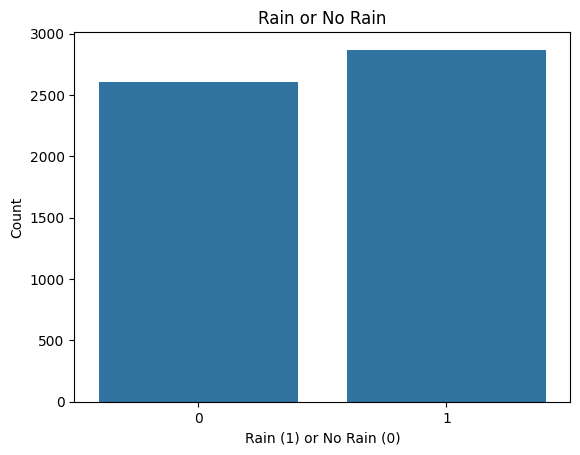

In [322]:
# Distribution of rain_or_not
sns.countplot(x='rain_or_not', data=df)
plt.title('Rain or No Rain')
plt.xlabel('Rain (1) or No Rain (0)')
plt.ylabel('Count')
plt.show()

In [323]:
target_distribution_explanations = """The target variable, rain_or_not, shows a slight class imbalance, with 2868 instances of rain compared to 2604 instances of no rain. This imbalance may lead the model to favor predictions for the majority class (rain), potentially reducing its ability to accurately identify no-rain events. As a result, relying solely on accuracy as a performance metric is insufficient. Instead, more balanced metrics such as precision, recall and the F1-score should be prioritised to provide a more meaningful evaluation of the model's performance. To address this imbalance, applying class weighting during model training can help the model generalise better to the minority class, improving its overall predictive capability.
"""

In [324]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `temperature_2m_mean `

In [325]:
df['temperature_2m_mean'].describe()

count    5472.000000
mean       17.525978
std         4.201603
min         7.439583
25%        13.963730
50%        17.618583
75%        20.939852
max        30.516668
Name: temperature_2m_mean, dtype: float64

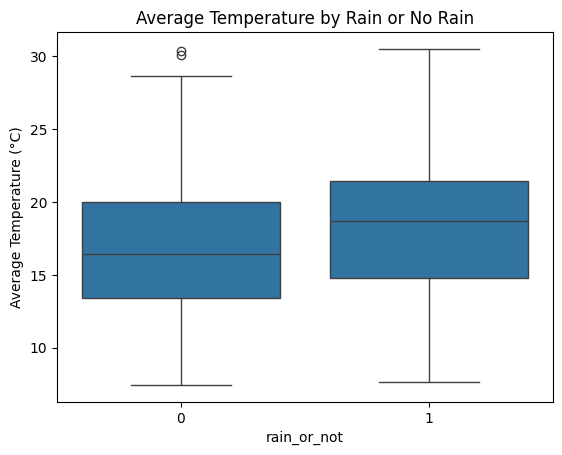

In [326]:
# Distribution of Average Temperature by Rain or No Rain
sns.boxplot(x='rain_or_not', y='temperature_2m_mean', data=df)
plt.title('Average Temperature by Rain or No Rain')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [327]:
feature_1_insights = """The analysis of average temperature on days preceding rainfall shows that these days generally exhibit a slightly higher median temperature, along with increased lower and upper quartile values, compared to days not followed by rain. This suggests a subtle association where warmer conditions may increase the likelihood of rainfall occurring seven days later in Sydney. However, the difference in temperature distributions between rainy and non-rainy days is relatively minor, indicating that average temperature alone is not a strong predictor of future rainfall. The limited distinction between the two groups underscores the difficulty of relying solely on this feature for accurate rainfall prediction."""

In [328]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `relative_humidity_2m_mean`

In [329]:
df['relative_humidity_2m_mean'].describe()

count    5472.000000
mean       72.660187
std        10.853833
min        23.854151
25%        66.325823
50%        74.309856
75%        80.753048
max        95.974464
Name: relative_humidity_2m_mean, dtype: float64

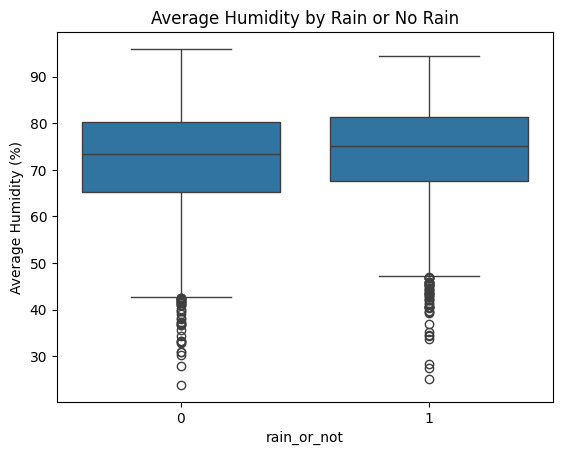

In [330]:
# Distribution of Average Humidity by Rain or No Rain
sns.boxplot(x='rain_or_not', y='relative_humidity_2m_mean', data=df)
plt.title('Average Humidity by Rain or No Rain')
plt.ylabel('Average Humidity (%)')
plt.show()

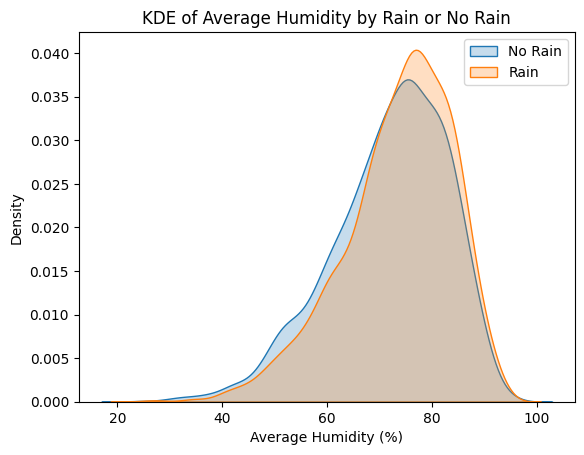

In [331]:
# KDE plot of relative_humidity_2m_mean
sns.kdeplot(data=df[df['rain_or_not']==0]['relative_humidity_2m_mean'], label='No Rain', shade=True)
sns.kdeplot(data=df[df['rain_or_not']==1]['relative_humidity_2m_mean'], label='Rain', shade=True)
plt.title('KDE of Average Humidity by Rain or No Rain')
plt.xlabel('Average Humidity (%)')
plt.legend()
plt.show()

In [332]:
feature_2_insights = """An analysis of the relative_humidity_2m_mean feature reveals only a slight difference in distribution between days followed by rain and those that are not. Both the boxplot and KDE plot suggest a subtle trend in which no-rain days tend to have lower humidity levels, while rain days are associated with slightly higher humidity. However, this distinction is not clearly defined. The KDE plot, in particular, reveals a significant overlap between the two classes, indicating that any association between relative humidity and rainfall occurring seven days later is weak. As such, while this feature may contribute marginally to the model’s predictive capability, it lacks strong discriminatory power on its own and would need to be used in conjunction with other, more informative variables."""

In [333]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `cloud_cover_mean `


In [334]:
df['cloud_cover_mean'].describe()

count    5472.000000
mean       48.355961
std        29.581888
min         0.000000
25%        24.000000
50%        47.791668
75%        72.166664
max       100.000000
Name: cloud_cover_mean, dtype: float64

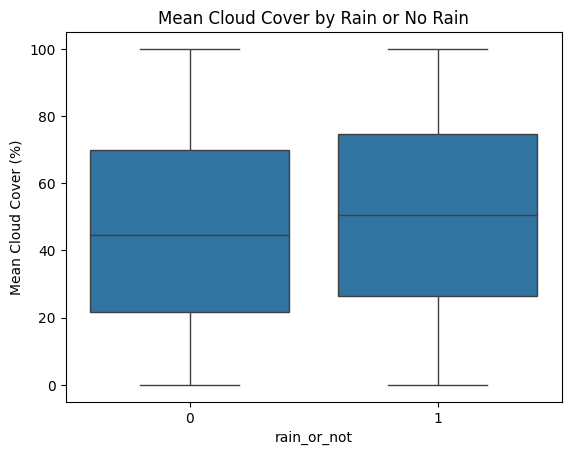

In [335]:
# Distribution of Mean Cloud Cover by Rain or No Rain
sns.boxplot(x='rain_or_not', y='cloud_cover_mean', data=df)
plt.title('Mean Cloud Cover by Rain or No Rain')
plt.ylabel('Mean Cloud Cover (%)')
plt.show()

In [336]:
feature_3_insights = """The cloud_cover_mean feature shows a slightly higher median and interquartile range on days followed by rain compared to no-rain days, suggesting a weak positive relationship between increased cloud cover and upcoming rainfall. This aligns with meteorological understanding, as cloud formation often precedes precipitation. However, the overlap in distributions indicates limited discriminatory power. Due to its variability and potential noise, cloud cover should be used alongside other features to improve predictive accuracy for rainfall events seven days in advance."""

In [337]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.8 Explore Feature of Interest `shortwave_radiation_sum`

In [338]:
df['shortwave_radiation_sum'].describe()

count    5472.000000
mean       16.798746
std         7.127212
min         0.810000
25%        11.280000
50%        15.810000
75%        22.280001
max        33.660000
Name: shortwave_radiation_sum, dtype: float64

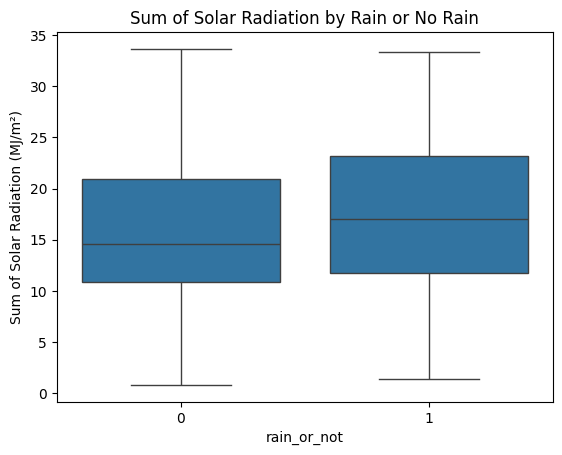

In [339]:
# Distribution of Sum of Solar Radiation by Rain or No Rain
sns.boxplot(x='rain_or_not', y='shortwave_radiation_sum', data=df)
plt.title('Sum of Solar Radiation by Rain or No Rain')
plt.ylabel('Sum of Solar Radiation (MJ/m²)')
plt.show()

In [340]:
feature_4_insights = """The shortwave_radiation_sum feature displays a slightly higher median and interquartile range on days followed by rain compared to those that are not, as observed in the boxplot. This finding appears counterintuitive, since rainfall is typically associated with lower solar radiation due to increased cloud cover. However, this may indicate a lagged atmospheric effect, where higher radiation levels on a given day are linked to atmospheric conditions that eventually lead to rainfall. While this pattern suggests that shortwave radiation may hold some predictive value, its indirect relationship to rain events limits its effectiveness as a standalone feature."""

In [341]:
# Do not modify this code
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

---
## D. Feature Selection


### D.1 Approach "Correlation Analysis"


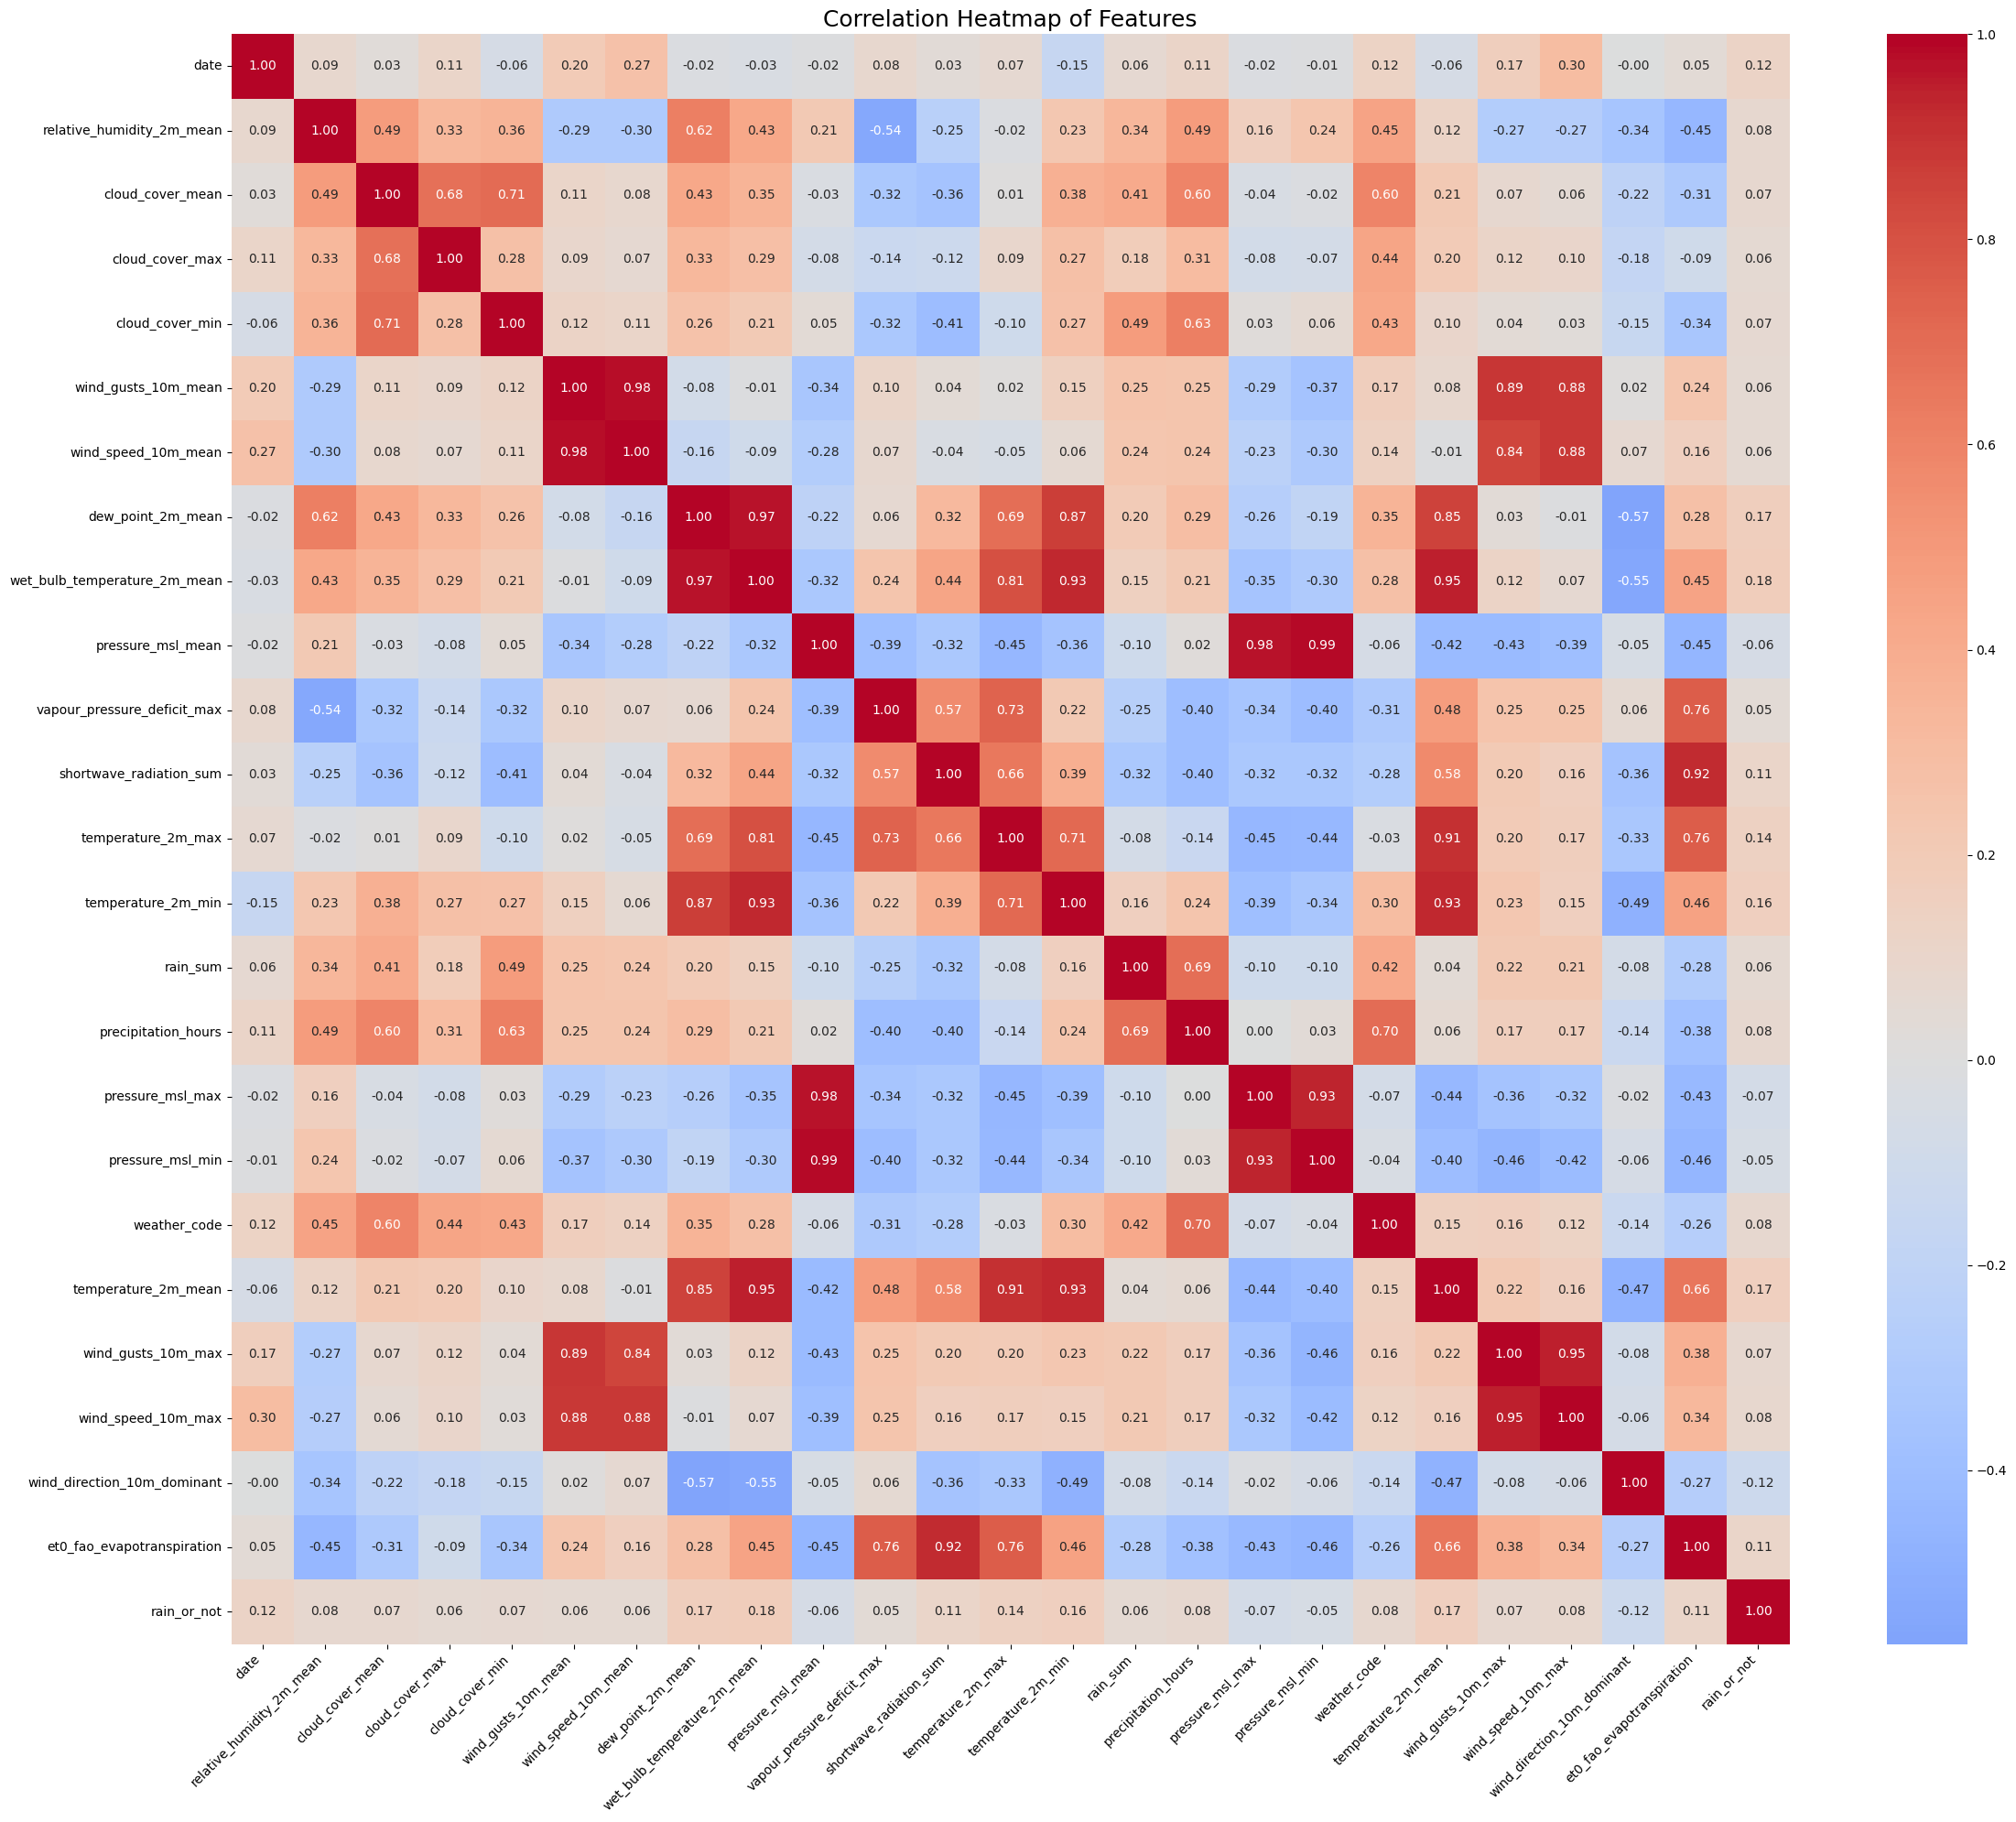

In [342]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(24, 20)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [343]:
# Correlation between numerical features and target variable
from scipy.stats import pointbiserialr

correlations = {}
for col in df.select_dtypes(include=['float32']).columns:
    corr, _ = pointbiserialr(df[col], df['rain_or_not'])
    correlations[col] = corr

# Sort by strength of correlation
sorted_corr = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

# Print top correlated features
for feature, corr in sorted_corr.items():
    print(f"{feature}: {corr:.3f}")

wet_bulb_temperature_2m_mean: 0.176
dew_point_2m_mean: 0.172
temperature_2m_mean: 0.166
temperature_2m_min: 0.156
temperature_2m_max: 0.145
wind_direction_10m_dominant: -0.116
et0_fao_evapotranspiration: 0.107
shortwave_radiation_sum: 0.106
wind_speed_10m_max: 0.084
precipitation_hours: 0.077
relative_humidity_2m_mean: 0.077
weather_code: 0.077
cloud_cover_mean: 0.073
pressure_msl_max: -0.070
wind_gusts_10m_max: 0.069
cloud_cover_min: 0.066
wind_gusts_10m_mean: 0.060
pressure_msl_mean: -0.059
wind_speed_10m_mean: 0.057
rain_sum: 0.057
cloud_cover_max: 0.057
pressure_msl_min: -0.049
vapour_pressure_deficit_max: 0.046


In [344]:
feature_selection_1_insights = """The feature selection process combines domain knowledge with exploratory data analysis, while final decisions are deferred until model-based feature importance evaluation. Correlation analysis reveals multicollinearity among temperature and pressure variables, but these features are retained to allow the creation of derived variables such as temperature_range and pressure_range. Similar overlaps exist among humidity and wind features, which are also kept for further assessment. Point-biserial correlation is used to assess linear relationships with the target variable, however, since it does not capture non-linear effects, no features are excluded based solely on this metric. Overall, the feature set remains broad to capture both linear and non-linear signals, with final selection guided by model-driven feature importance."""

In [345]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## E. Data Preparation

In [346]:
df_clean = df.copy()
df_clean

,date,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_max,cloud_cover_min,wind_gusts_10m_mean,wind_speed_10m_mean,dew_point_2m_mean,wet_bulb_temperature_2m_mean,pressure_msl_mean,...,precipitation_hours,pressure_msl_max,pressure_msl_min,weather_code,temperature_2m_mean,wind_gusts_10m_max,wind_speed_10m_max,wind_direction_10m_dominant,et0_fao_evapotranspiration,rain_or_not
0,2009-12-31 14:00:00+00:00,82.359489,95.791664,100.0,58.0,21.330000,10.419551,19.672583,20.643309,1011.920837,...,12.0,1014.099976,1009.500000,53.0,22.964251,35.639999,18.581022,331.647491,2.459723,1
1,2010-01-01 14:00:00+00:00,84.276886,64.166664,100.0,17.0,26.010002,8.355687,20.716331,21.520597,1007.470764,...,14.0,1011.000000,1003.900024,63.0,23.612165,37.439999,15.584300,298.610291,4.571662,0
2,2010-01-02 14:00:00+00:00,74.055122,100.000000,100.0,100.0,28.275000,12.964748,15.066335,16.673801,1015.529236,...,7.0,1019.500000,1011.099976,51.0,19.882996,37.439999,18.345877,146.744644,2.140701,0
3,2010-01-03 14:00:00+00:00,70.006538,72.875000,100.0,9.0,23.565001,11.067534,15.185082,17.092829,1019.012390,...,4.0,1020.700012,1017.200012,51.0,20.887167,37.439999,16.870138,69.884773,3.498662,0
4,2010-01-04 14:00:00+00:00,73.884598,21.833334,95.0,0.0,24.285002,9.724721,17.505919,19.079020,1015.891663,...,0.0,1018.299988,1013.000000,3.0,22.520498,39.239998,17.477621,35.137077,5.620671,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2024-12-19 14:00:00+00:00,65.657463,13.125000,71.0,0.0,26.100004,9.855006,12.733334,15.322675,1012.229187,...,0.0,1015.799988,1009.099976,2.0,19.704168,39.959999,15.227830,176.653732,5.755971,1
5468,2024-12-20 14:00:00+00:00,70.268272,19.916666,100.0,0.0,24.494997,9.155691,15.616666,17.714354,1008.329102,...,2.0,1010.900024,1006.200012,51.0,21.762499,39.959999,16.856689,107.162010,5.834490,1
5469,2024-12-21 14:00:00+00:00,72.921722,63.791668,100.0,3.0,30.195002,11.684125,16.806250,18.529230,1006.137451,...,1.0,1010.299988,1001.200012,51.0,22.035416,52.199997,22.609177,74.324905,4.289347,0
5470,2024-12-22 14:00:00+00:00,58.926105,34.000000,100.0,0.0,30.824997,11.640549,11.868751,16.742216,1001.937500,...,0.0,1008.099976,998.299988,3.0,22.908333,56.519997,21.791153,220.992050,6.802649,1


---
## F. Feature Engineering

### F.1 New Feature "temperature_range"


In [347]:
df_clean['temperature_range'] = df_clean['temperature_2m_max'] - df_clean['temperature_2m_min']

In [348]:
df_clean.drop(columns=['temperature_2m_max', 'temperature_2m_min'], inplace=True)

In [349]:
feature_engineering_1_explanations = """Since there is a relationship between temperature and the likelihood of rainfall (rain_or_not), creating a new feature that captures the temperature range, calculated by subtracting the minimum temperature from the maximum, which can provide additional insight into daily temperature variability. This feature helps reduce multicollinearity between highly correlated variables like temperature_max and temperature_min, which can, in turn, enhance the model’s predictive performance and interpretability."""

In [350]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Month"




In [351]:
df_clean['month'] = df_clean['date'].dt.month

In [352]:
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)

In [353]:
df_clean.drop(columns=['month'], inplace=True)

In [354]:
feature_engineering_2_explanations = """Extracting the month from the date column is important because rainfall patterns often exhibit seasonal cycles. Representing the month using sine and cosine transformations preserves its cyclical nature, enabling models to more effectively capture the seasonal variations in rainfall. This approach enhances the model’s ability to learn and represent the influence of seasonal patterns on rainfall behaviour.
"""

In [355]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "pressure_range"

In [356]:
df_clean['pressure_range'] = df_clean['pressure_msl_max'] - df_clean['pressure_msl_min']

In [357]:
df_clean.drop(columns=['pressure_msl_max', 'pressure_msl_min'], inplace=True)

In [358]:
feature_engineering_3_explanations = """Since pressure_msl_max, pressure_msl_min and pressure_msl_mean are highly correlated, a new feature, pressure_range, is engineered by subtracting pressure_msl_min from pressure_msl_max. This transformation serves two main purposes. First, it captures the daily variability in atmospheric pressure, which may provide a more meaningful signal for weather dynamics than individual values alone. Second, by replacing two highly correlated features with a single derived metric, this step helps to reduce multicollinearity, which can improve model stability and interpretability. As a result, pressure_msl_max and pressure_msl_min are dropped from the dataset in favor of the more informative pressure_range."""

In [359]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

### F.4 New Feature  "wind_direction_10m_dominant"

In [360]:
#Statistics of wind_direction_10m_dominant
df_clean['wind_direction_10m_dominant'].describe()

count    5472.000000
mean      180.736069
std       103.358536
min         0.100736
25%        83.111301
50%       182.819855
75%       272.059395
max       359.857452
Name: wind_direction_10m_dominant, dtype: float64

In [361]:
# Convert degrees to radians
df_clean['wind_direction_rad'] = np.deg2rad(df_clean['wind_direction_10m_dominant'])

# Create sine and cosine components
df_clean['wind_direction_sin'] = np.sin(df_clean['wind_direction_rad'])
df_clean['wind_direction_cos'] = np.cos(df_clean['wind_direction_rad'])

# Drop wind_direction_10m_dominant and wind_direction_rad
df_clean.drop(columns=['wind_direction_10m_dominant', 'wind_direction_rad'], inplace=True)

In [362]:
feature_engineering_4_explanations = """The feature wind_direction_10m_dominant is measured in degrees, ranging from 0° to 360°. However, this representation introduces a challenge for machine learning models, which typically interpret such values linearly. In this context, the model may incorrectly perceive 0° and 360° as being at opposite ends of the scale, despite both representing the same physical direction (North). To resolve this issue, the wind direction is transformed into two continuous features by taking the sine and cosine of the angle (after converting it to radians). This transformation maps the directional data onto the unit circle, effectively preserving its circular structure. As a result, the model can better capture directional continuity and make more accurate inferences from the data."""

In [363]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_4_explanations', value=feature_engineering_4_explanations)

### F.5 New Feature  "Binary Lag Features (Past 3 Days + Current Day)"

In [364]:
# Lag features for precipitation_sum for the past 3 days
df_clean['rain_sum_lag_1'] = df_clean['rain_sum'].shift(1)
df_clean['rain_sum_lag_2'] = df_clean['rain_sum'].shift(2)
df_clean['rain_sum_lag_3'] = df_clean['rain_sum'].shift(3)

In [365]:
#Drop NaN values from lag columns
lag_cols = ['rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3']

df_clean = df_clean.dropna(subset=lag_cols).reset_index(drop=True)

In [366]:
# Create binary features: 1 if rain_sum_lag_n > 1, else 0
df_clean['rain_occurred'] = (df_clean['rain_sum'] > 1).astype(int)
df_clean['rain_occurred_lag_1'] = (df_clean['rain_sum_lag_1'] > 1).astype(int)
df_clean['rain_occurred_lag_2'] = (df_clean['rain_sum_lag_2'] > 1).astype(int)
df_clean['rain_occurred_lag_3'] = (df_clean['rain_sum_lag_3'] > 1).astype(int)

In [367]:
# Drop rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3
df_clean.drop(columns=['rain_sum', 'rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3'], inplace=True)

In [368]:
feature_engineering_5_explanations = """Features such as rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3 are first created to serve as the basis for generating binary indicators. The corresponding binary features, rain_occurred, rain_occurred_lag_1, rain_occurred_lag_2 and rain_occurred_lag_3 indicate whether rainfall occurred on the current day and each of the previous three days. These lagged variables provide the model with contextual information about recent rainfall patterns, helping it identify buildup conditions that may influence the likelihood of rainfall occurring seven days later. By incorporating the occurrence of rain, the model is better equipped to capture the dynamics of short-term weather cycles and improve predictive performance."""

In [369]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_5_explanations', value=feature_engineering_5_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [370]:
# Create copies of df_clean for modeling
df_eng = df_clean.copy()

In [371]:
# Create splits based on date ranges
train_df = df_eng[df_eng['date'] < '2023-01-01']
val_df   = df_eng[(df_eng['date'] >= '2023-01-01') & (df_eng['date'] < '2024-01-01')]
test_df  = df_eng[(df_eng['date'] >= '2024-01-01') & (df_eng['date'] < '2025-01-01')]

In [372]:
# Drop date column
train_df.drop(columns=['date'], inplace=True)
val_df.drop(columns=['date'], inplace=True)
test_df.drop(columns=['date'], inplace=True)

In [373]:
# The counts of rain_or_not in train_df
train_df['rain_or_not'].value_counts()

rain_or_not
1    2448
0    2298
Name: count, dtype: int64

In [374]:
# The counts of rain_or_not in val_df
val_df['rain_or_not'].value_counts()

rain_or_not
1    198
0    167
Name: count, dtype: int64

In [375]:
# The counts of rain_or_not in test_df
test_df['rain_or_not'].value_counts()

rain_or_not
1    221
0    137
Name: count, dtype: int64

In [376]:
from my_krml_25677648.data.sets import pop_target

In [377]:
# Remove target variable from the training, validation and testing dataset
X_train, y_train = pop_target(train_df, 'rain_or_not')
X_val, y_val = pop_target(val_df, 'rain_or_not')
X_test, y_test = pop_target(test_df, 'rain_or_not')

In [378]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(4746, 27)
(4746,)
(365, 27)
(365,)
(358, 27)
(358,)


In [379]:
data_splitting_explanations = """Since predicting whether it will rain or not is a time-series task, traditional data splitting methods such as random sampling or stratified sampling are not appropriate, as they risk data leakage by allowing future information to influence past predictions. To preserve the natural order of events, the dataset is split chronologically. Specifically, the training dataset includes all data prior to 2023, the validation dataset covers the full year of 2023, and the testing dataset comprises data from the entire year of 2024. This method mirrors real-world forecasting scenarios, where models are trained on historical data and evaluated on their ability to generalise to future, unseen observations."""

In [380]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Build Pipeline for Data Transformation "Scaling" and "One-hot Encoding"

In [381]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [382]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   relative_humidity_2m_mean     4746 non-null   float32
 1   cloud_cover_mean              4746 non-null   float32
 2   cloud_cover_max               4746 non-null   float32
 3   cloud_cover_min               4746 non-null   float32
 4   wind_gusts_10m_mean           4746 non-null   float32
 5   wind_speed_10m_mean           4746 non-null   float32
 6   dew_point_2m_mean             4746 non-null   float32
 7   wet_bulb_temperature_2m_mean  4746 non-null   float32
 8   pressure_msl_mean             4746 non-null   float32
 9   vapour_pressure_deficit_max   4746 non-null   float32
 10  shortwave_radiation_sum       4746 non-null   float32
 11  precipitation_hours           4746 non-null   float32
 12  weather_code                  4746 non-null   float32
 13  temperat

In [383]:
# Identify the numerical columns 
num_cols = ['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
            'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
            'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
            'pressure_msl_mean', 'vapour_pressure_deficit_max',
            'shortwave_radiation_sum', 'precipitation_hours',
            'temperature_2m_mean', 'wind_gusts_10m_max', 'wind_speed_10m_max',
            'et0_fao_evapotranspiration', 'temperature_range',
            'pressure_range', 'rain_occurred', 'rain_occurred_lag_1', 'rain_occurred_lag_2',
            'rain_occurred_lag_3']

# Identify categorical column
cat_cols = ['weather_code']

# The cyclic features 
passthrough_cols = ['month_sin', 'month_cos', 'wind_direction_sin', 'wind_direction_cos']

# Define the transformers
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(sparse_output=False, drop='first')

# Compose column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
        ('passthrough', 'passthrough', passthrough_cols)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit_transform on training dataset
X_train_processed = pipeline.fit_transform(X_train)

# For validation/testing dataset, only transform
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)

# Convert back to DataFrame with proper column names 
# Get column names for numeric + categorical + passthrough
num_features = num_cols
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
passthrough_features = passthrough_cols

all_features = list(num_features) + list(cat_features) + list(passthrough_features)

X_train_df = pd.DataFrame(X_train_processed, columns=all_features, index=X_train.index)
X_val_df = pd.DataFrame(X_val_processed, columns=all_features, index=X_val.index)
X_test_df = pd.DataFrame(X_test_processed, columns=all_features, index=X_test.index)

In [384]:
data_transformation_1_explanations = """The dataset comprises a combination of numerical, categorical and engineered cyclic features, each requiring specific preprocessing techniques to ensure optimal model performance. Numerical features are standardised using z-score normalisation via StandardScaler, which centers them around a mean of 0 and a standard deviation of 1. This standardisation ensures that no single feature dominates the learning process due to scale differences. Categorical variables, such as weather_code, are encoded using one-hot encoding with the drop='first' parameter, which mitigates the risk of multicollinearity while expanding the feature space. Cyclic variables such as month_sin, month_cos, wind_direction_sin and wind_direction_cos are already transformed to represent periodicity and are passed through unchanged.
These preprocessing steps are implemented using a ColumnTransformer, which is integrated into a Pipeline to ensure consistent application of transformations across the training, validation and testing datasets. The pipeline is fit exclusively on the training dataset, while the validation and test datasets are transformed using the parameters learned from the training dataset to prevent data leakage. Following transformation, the resulting NumPy arrays are converted back into pandas DataFrames with appropriately assigned feature names, thereby facilitating interpretability and further analysis. This structured preprocessing workflow enhances reproducibility, maintains data integrity, and prepares the dataset effectively for downstream modeling tasks.
"""

In [385]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [386]:
from pathlib import Path

# Create the path to the folder
path = Path.home() / "Desktop" / "36120" / "assignment2"/"classification"

In [387]:
# Do not modify this code
try:
  X_train_df.to_csv(path / 'X_train.csv', index=False)
  y_train.to_csv(path / 'y_train.csv', index=False)

  X_val_df.to_csv(path / 'X_val.csv', index=False)
  y_val.to_csv(path / 'y_val.csv', index=False)

  X_test_df.to_csv(path / 'X_test.csv', index=False)
  y_test.to_csv(path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [388]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [389]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [390]:
performance_metrics_explanations = """Accuracy reflects the model’s overall ability to correctly predict both rain and no rain instances. However, given the slight imbalance in the dataset, relying solely on accuracy can be misleading. More informative metrics such as precision, recall and the F1 score offer deeper insights into model performance. Among these, the F1 score is selected as the primary evaluation metric, as it provides a balanced measure of precision and recall. This is particularly important when both false positives, such as incorrectly forecasting rain, and false negatives, such as missing an actual rain event, carry significant consequences. The confusion matrix is also used to break down predictions into true positives, true negatives, false positives and false negatives, offering a detailed view of the model’s predictive strengths and weaknesses. Additionally, the Critical Success Index (CSI) is included as a domain-specific metric commonly used in meteorology to evaluate the accuracy of event-based forecasts. Together, these metrics provide a comprehensive and robust assessment of model effectiveness in predicting rainfall events.
"""

In [391]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: 
1) The performance of the Random Forest model is not significantly better than that of the baseline model.
2) The performance of the Random Forest model with feature selection is not significantly better than that of the Random Forest model using all features.

Alternative hypothesis: 
1) The performance of the Random Forest model is significantly better than that of the baseline model.
2) The performance of the Random Forest model with feature selection is significantly better than that of the Random Forest model using all features.

### J.1 Import Algorithm

In [392]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [393]:
algorithm_selection_explanations = """Random Forest is selected for this task because of its capability to model complex and non-linear relationships between the input features and the target variable, which logistic regression may not capture effectively. It functions by constructing an ensemble of decision trees, each trained on a random subset of the data, and then aggregates their predictions to improve overall accuracy and reduce model variance. This ensemble approach contributes to increased robustness and improved generalisation to unseen data, helping to minimise overfitting. In addition, Random Forest provides interpretable feature importance scores, which offer valuable insights into the relative contribution of each variable in predicting rainfall.
"""

In [394]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [395]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [396]:
# Set up the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [800],              
    'max_depth': [5],              
    'min_samples_split': [2],              
    'min_samples_leaf': [5],              
    'max_features': ['sqrt']
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 700, 800, 900],   # Number of trees in the forest
#     'max_depth': [None, 4, 5, 6, 7, 10],                   # Max depth of each tree
#     'min_samples_split': [2, 3, 4, 5],                 # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 3, 4, 5],                   # Minimum samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],           # Number of features to consider at each split
# }

In [397]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=34),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train_df, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 800}
Best cross-validation F1 score: 0.5744


In [398]:
hyperparameters_selection_explanations = """Class weight is used to address class imbalance by assigning greater importance to minority classes, thereby improving the model’s ability to detect infrequent events. The number of estimators determines the size of the ensemble, balancing predictive performance with computational efficiency. Maximum depth limits the complexity of individual trees, acting as a regularisation technique to prevent overfitting. The minimum number of samples required for node splitting and leaf formation controls tree growth, promoting smoother models and enhancing generalisation to unseen data. Finally, the maximum features parameter introduces randomness in feature selection at each split, reducing correlation between trees and increasing the robustness of the ensemble.
"""

In [399]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [400]:
# Dummy Model
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train_df, y_train)

DummyClassifier(strategy='most_frequent')

In [401]:
# Random Forest
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [402]:
from my_krml_25677648.models.performance import get_predictions, classification_metrics

#### Dummy model

In [403]:
# Validation
y_val_pred = get_predictions(dummy_clf, X_val_df)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.5424657534246575, 'Precision': np.float64(0.5424657534246575), 'Recall': np.float64(1.0), 'F1_score': np.float64(0.7033747779751333)}


In [404]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.54


In [405]:
# Tesitng
y_test_pred = get_predictions(dummy_clf, X_test_df)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.61731843575419, 'Precision': np.float64(0.61731843575419), 'Recall': np.float64(1.0), 'F1_score': np.float64(0.7633851468048359)}


In [406]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.62


#### Random Forest

In [407]:
# Validation
y_val_pred = get_predictions(best_model, X_val_df)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.6767123287671233, 'Precision': np.float64(0.717391304347826), 'Recall': np.float64(0.6666666666666666), 'F1_score': np.float64(0.6910994764397905)}


In [408]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.53


In [409]:
# Testing
y_test_pred = get_predictions(best_model, X_test_df)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.6089385474860335, 'Precision': np.float64(0.7237569060773481), 'Recall': np.float64(0.5927601809954751), 'F1_score': np.float64(0.6517412935323383)}


In [410]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.48


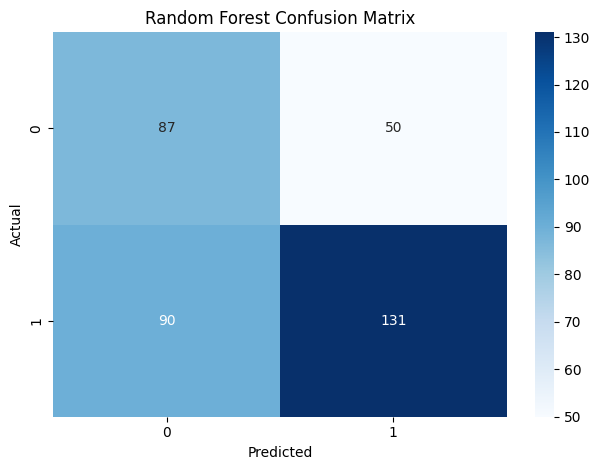

In [411]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

#### Feature Importance

In [412]:
best_model.feature_importances_

array([0.04211865, 0.03171031, 0.01444903, 0.02083753, 0.03566443,
       0.03352041, 0.09843855, 0.09937386, 0.03256315, 0.02574107,
       0.05339803, 0.02432575, 0.08418705, 0.02864965, 0.04769722,
       0.04393765, 0.02965198, 0.02536906, 0.00388588, 0.0041826 ,
       0.00721921, 0.00327081, 0.000662  , 0.00097349, 0.00213984,
       0.00141111, 0.00132308, 0.00052705, 0.00122596, 0.00361948,
       0.00013223, 0.04004245, 0.08306835, 0.04782367, 0.0268594 ])

In [413]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train_df.columns,
        'feature_importance': best_model.feature_importances_
     }
)

In [414]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf_df.head(40)

,feature,feature_importance
0,wet_bulb_temperature_2m_mean,0.099374
1,dew_point_2m_mean,0.098439
2,temperature_2m_mean,0.084187
3,month_cos,0.083068
4,shortwave_radiation_sum,0.053398
5,wind_direction_sin,0.047824
6,wind_speed_10m_max,0.047697
7,et0_fao_evapotranspiration,0.043938
8,relative_humidity_2m_mean,0.042119
9,month_sin,0.040042


In [415]:
alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

In [416]:
# Select top 12 features
top_12_features = feat_imp_rf_df.head(12)['feature'].tolist()

print("Top 12 features:", top_12_features)

Top 12 features: ['wet_bulb_temperature_2m_mean', 'dew_point_2m_mean', 'temperature_2m_mean', 'month_cos', 'shortwave_radiation_sum', 'wind_direction_sin', 'wind_speed_10m_max', 'et0_fao_evapotranspiration', 'relative_humidity_2m_mean', 'month_sin', 'wind_gusts_10m_mean', 'wind_speed_10m_mean']


In [417]:
# Filter the 12 features for X_train_df, X_val_df and X_test_df
X_train_df_selected_features = X_train_df[top_12_features]
X_val_df_selected_features = X_val_df[top_12_features]
X_test_df_selected_features = X_test_df[top_12_features]

In [418]:
# Set up the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [600],  
    'max_depth': [6],                   
    'min_samples_split': [2],             
    'min_samples_leaf': [3],                   
    'max_features': ['sqrt']         
}

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500, 600, 700],   # Number of trees in the forest
#     'max_depth': [None, 4, 5, 6, 7, 10],                   # Max depth of each tree
#     'min_samples_split': [2, 3, 4, 5],                 # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 3, 4, 5],                   # Minimum samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider at each split
# }

In [419]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=34),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train_df_selected_features, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 600}
Best cross-validation F1 score: 0.5723


In [420]:
best_model_selected_features = grid_search.best_estimator_

In [421]:
# Validation
y_val_pred = get_predictions(best_model_selected_features, X_val_df_selected_features)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.6547945205479452, 'Precision': np.float64(0.6935483870967742), 'Recall': np.float64(0.6515151515151515), 'F1_score': np.float64(0.671875)}


In [422]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.51


In [423]:
# Testing
y_test_pred = get_predictions(best_model_selected_features, X_test_df_selected_features)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.611731843575419, 'Precision': np.float64(0.7252747252747253), 'Recall': np.float64(0.5972850678733032), 'F1_score': np.float64(0.6550868486352357)}


In [424]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.49


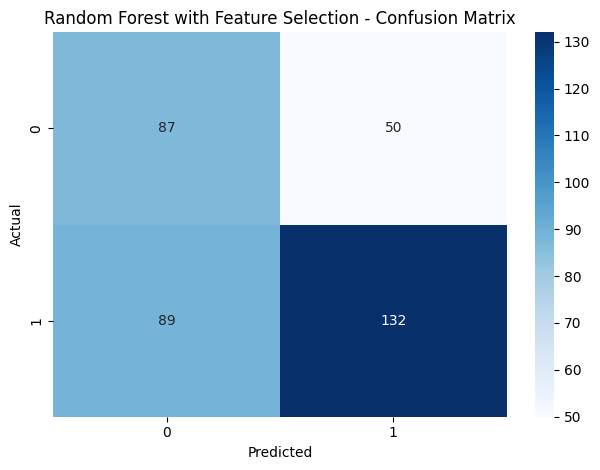

In [425]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('Random Forest with Feature Selection - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [426]:
# Save model
import os
from joblib import dump

save_dir = '../../models/rain_or_not'  # correct relative path

os.makedirs(save_dir, exist_ok=True)  # just to be safe

dump(best_model_selected_features, os.path.join(save_dir, 'rain_or_not.joblib'))

['../../models/rain_or_not/rain_or_not.joblib']

In [427]:
model_performance_explanations = """After selecting the top 12 features based on feature importance from the initial Random Forest model, the overall model performance exhibits only a marginal improvement. While feature selection helps reduce model complexity and slightly enhances performance, the gain is not substantial. Compared to the original Random Forest model, the version using feature importance shows some reduction in overfitting. However, signs of overfitting persist, as evidenced by a noticeable drop in recall from 0.65 on the validation dataset to 0.60 on the testing dataset, alongside a decrease in the Critical Success Index from 0.51 to 0.49. These declines suggest that the model struggles to generalise effectively to unseen data, likely capturing noise or dataset-specific patterns during training. Nevertheless, the model produces fewer false positives compared to logistic regression and XGBoost, indicating better precision in identifying no-rain events. However, recall remains relatively low, meaning the model still misses a considerable number of actual rain events, highlighting a trade-off between precision and sensitivity.
"""

In [428]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [429]:
business_impacts_explanations = """The Random Forest model with feature selection achieves a recall of 0.60, an F1 score of 0.66, and a Critical Success Index (CSI) of 0.49. The CSI indicates that the model correctly predicts about half of the rain events. This highlights the challenge of accurately identifying all instances of rainfall, as the model misses a significant number of true positives. From a business perspective, this is particularly important because false negatives, failing to predict rain when it actually occurs, can lead to inadequate preparation, increased safety risks, and potentially costly damages or unexpected incidents. On the other hand, false positives, predicting rain when there is none, may cause unnecessary resource allocation or operational adjustments, however, these consequences are generally less severe than those resulting from false negatives in this context. Overall, the model shows relatively low recall, indicating missed rain events, but higher precision, which means it produces fewer false alarms and better identifies no rain cases compared to other models.
"""

In [430]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [431]:
experiment_outcome = """Null Hypothesis Partially Confirmed"""

In [432]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [435]:
experiment_results_explanations = """The null hypothesis is partially confirmed because the Random Forest model with feature selection does not outperform the dummy model. Since the dataset is slightly imbalanced with rain cases being more frequent, the dummy model which always predicts rain achieves relatively high performance metrics without learning from the data. However, the Random Forest model with feature selection performs better than the original version although the improvement is minimal. While this model may be deployed, it should primarily be regarded as a guideline due to its limited ability to fully capture the complexity of weather patterns. Future research should focus on exploring alternative weather-related models and incorporating additional data to achieve improved performance and more reliable predictions.
"""

In [436]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)